In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/startup-success-prediction/startup data.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd 
from sklearn.model_selection import train_test_split
import math
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt  # Matlab-style plotting
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
sns.set(style='white', context='notebook', palette='deep')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
Random_state=42
np.random.seed(0)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
dataset=pd.read_csv("../input/startup-success-prediction/startup data.csv",\
                    converters={'status': lambda x: int(x == 'acquired')},parse_dates=['founded_at','first_funding_at','last_funding_at'])
dataset.head()


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,2007-01-01,NaN,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,2000-01-01,NaN,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,2009-03-18,NaN,2010-03-30,2010-03-30,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,2002-01-01,NaN,2005-02-17,2007-04-25,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,2010-08-01,10/1/2012,2010-08-01,2012-04-01,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                923 non-null    int64         
 1   state_code                923 non-null    object        
 2   latitude                  845 non-null    float64       
 3   longitude                 919 non-null    float64       
 4   zip_code                  923 non-null    object        
 5   id                        923 non-null    object        
 6   city                      923 non-null    object        
 7   Unnamed: 6                430 non-null    object        
 8   name                      923 non-null    object        
 9   labels                    923 non-null    int64         
 10  founded_at                923 non-null    datetime64[ns]
 11  closed_at                 335 non-null    object        
 12  first_funding_at      

In [5]:
dataset.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [6]:
dataset.rename(columns={'status':'is_acquired'}, inplace=True)

In [12]:
dataset.describe()

,Unnamed: 0,latitude,longitude,labels,founded_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,is_acquired
count,923.000000,845.000000,919.000000,923.000000,923,923,923,902.000000,911.000000,754.000000,764.000000,863.000000,907.000000,8.580000e+02,922.000000,923.000000,817.0,840.0,881.0,719.0,770.0,779.0,844.0,850.0,861.0,871.0,898.0,889.0,920.0,923.000000,923.000000,923.000000,923.000000,923.000000,708.0,831.0,895.000000,747.0,923.000000
mean,572.297941,38.472462,-104.002010,0.646804,2005-09-10 00:57:43.488624128,2007-12-05 01:05:31.527627264,2009-08-15 00:31:12.156013056,2.035032,3.810615,2.920560,4.676679,6.290846,2.222712,1.319230e+07,1.835141,0.527627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322860,0.326111,0.254605,0.508126,0.392199,0.0,0.0,2.637261,1.0,0.646804
min,1.000000,32.715400,-122.756956,0.000000,1984-01-01 00:00:00,2000-01-01 00:00:00,2001-01-01 00:00:00,-3.506800,-1.986300,-3.750700,-3.882200,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,1.0,0.000000
25%,283.500000,37.396312,-122.204664,0.000000,2003-01-01 00:00:00,2006-03-01 00:00:00,2008-01-01 00:00:00,0.533550,1.661650,1.000000,2.380850,3.000000,1.000000,2.346250e+06,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.450000,1.0,0.000000
50%,577.000000,37.779281,-118.393064,1.000000,2006-01-01 00:00:00,2007-09-01 00:00:00,2009-12-16 00:00:00,1.409600,3.476700,2.500000,4.426050,5.000000,2.000000,9.175000e+06,2.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,2.333300,1.0,1.000000
75%,866.500000,40.729839,-77.311566,1.000000,2008-04-01 00:00:00,2009-11-01 00:00:00,2011-04-29 00:00:00,3.335625,5.483550,4.517125,6.726025,9.000000,3.000000,2.016500e+07,3.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,3.500000,1.0,1.000000
max,1153.000000,45.630695,-70.144101,1.000000,2013-04-16 00:00:00,2013-11-20 00:00:00,2013-11-20 00:00:00,8.021900,11.334200,10.134200,13.011000,20.000000,6.000000,5.750000e+07,6.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,7.000000,1.0,1.000000
std,333.585431,2.638587,21.304182,0.478222,NaN,NaN,NaN,1.971554,2.659274,2.517577,2.999197,4.554389,1.228350,1.346108e+07,1.307683,0.499507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.467823,0.469042,0.435875,0.500205,0.488505,0.0,0.0,1.481168,0.0,0.478222


# Correlation between numeric parameters


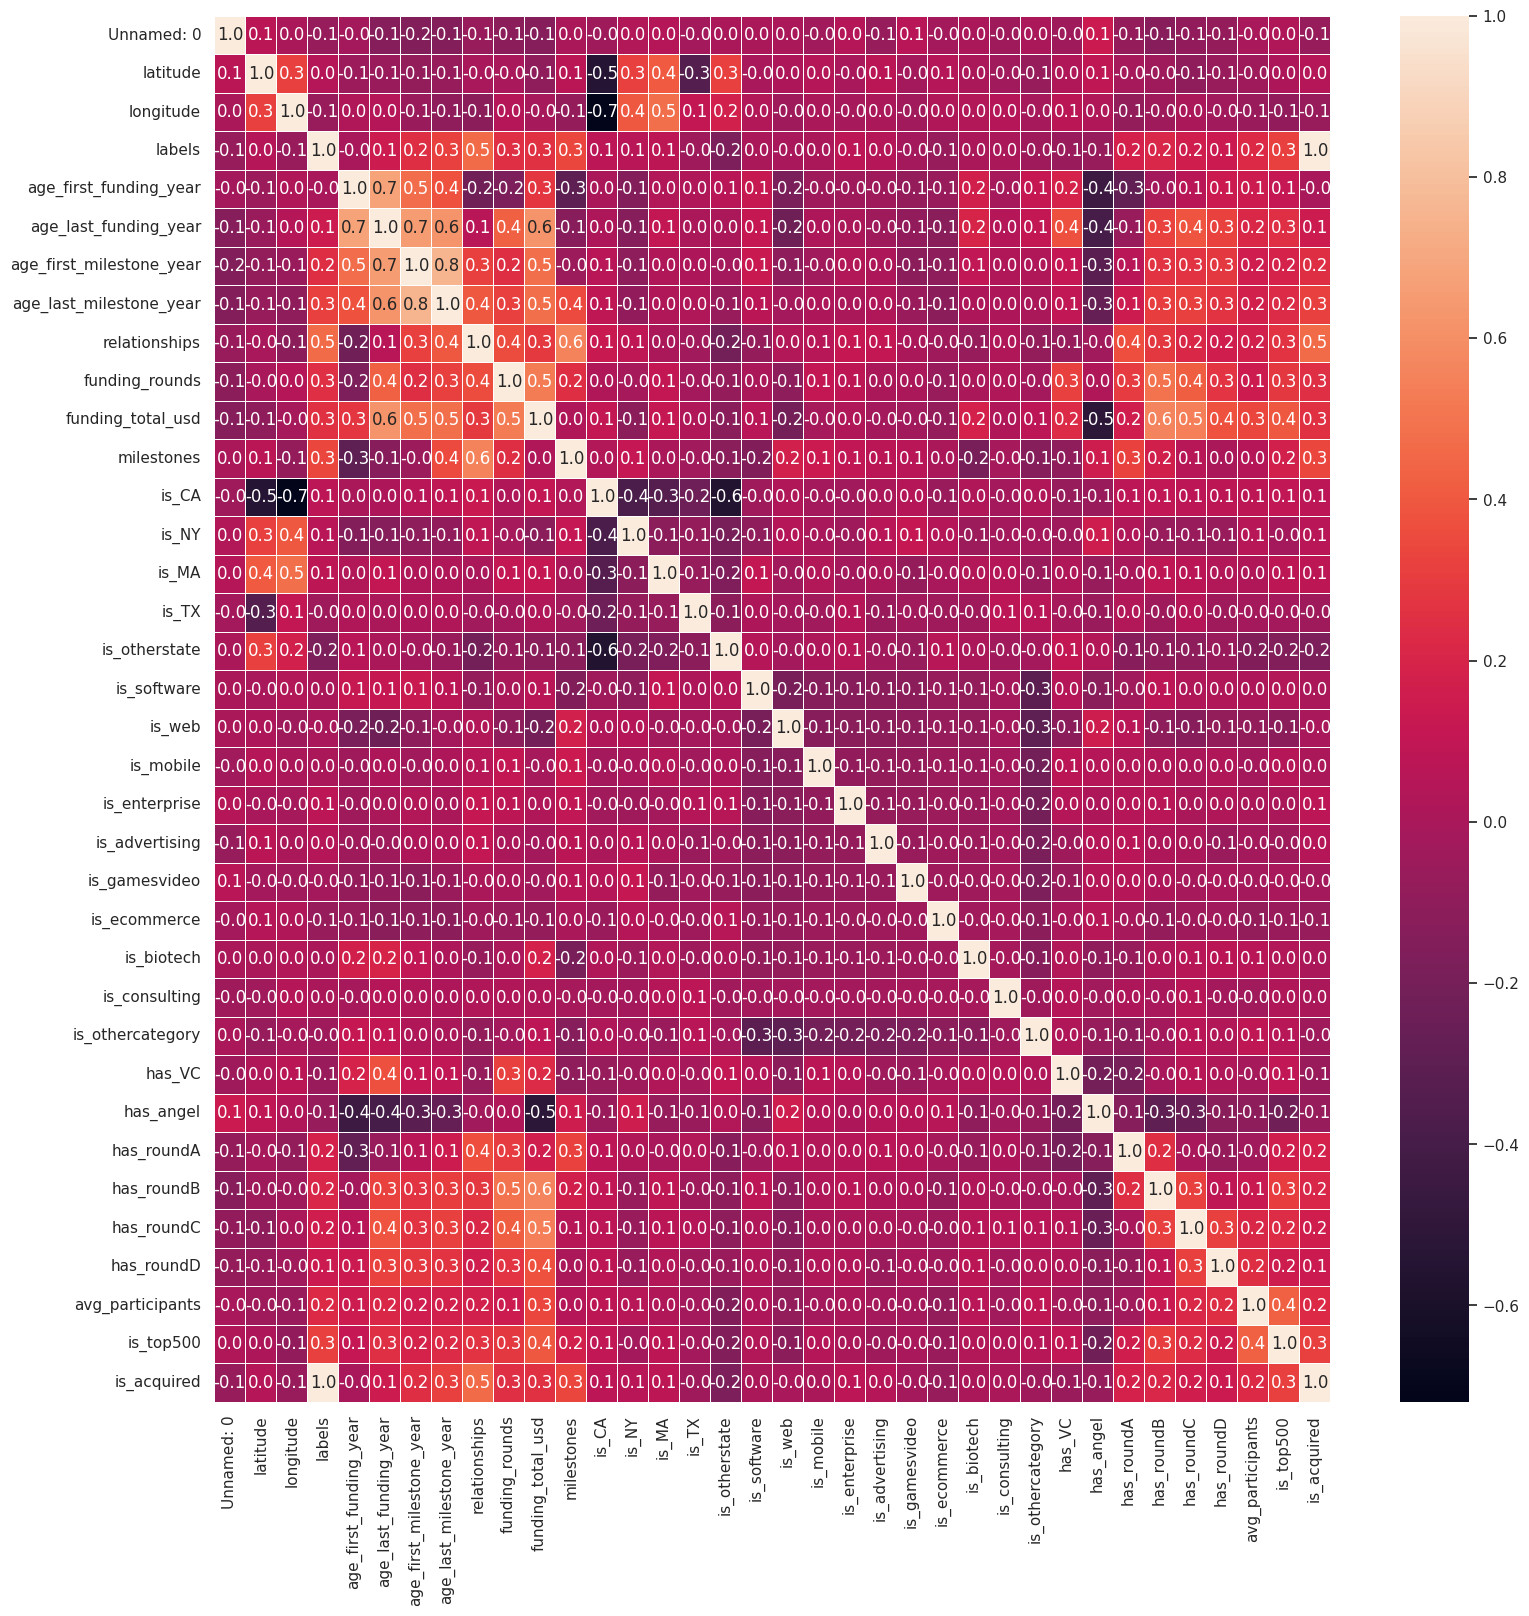

In [7]:
def draw_heatmap(dataset):
    
    
    f, ax = plt.subplots(figsize = (18, 18))
    
    corrMatt = dataset.corr(method='spearman')
    
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
    plt.show()
    
    
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
numerical_df_1=dataset.select_dtypes(numerics)
numerical_column_names = dataset.select_dtypes(numerics).columns

draw_heatmap(numerical_df_1)


# Detect outliers from numeric variables


In [8]:
def getOutliersMatrix(numerical_df, threshold=1.5):
    Q1 = numerical_df.quantile(0.25)
    Q3 = numerical_df.quantile(0.75)
    IQR = Q3 - Q1
    
    outdata = (numerical_df < (Q1 - 1.5 * IQR)) | (numerical_df > (Q3 + 1.5 * IQR))
    
    for name in numerical_df.columns:
        outdata.loc[(outdata[name] == True), name] = 1
        outdata.loc[(outdata[name] == False), name] = 0
    
    return outdata


outliersMatt = getOutliersMatrix(numerical_df_1)


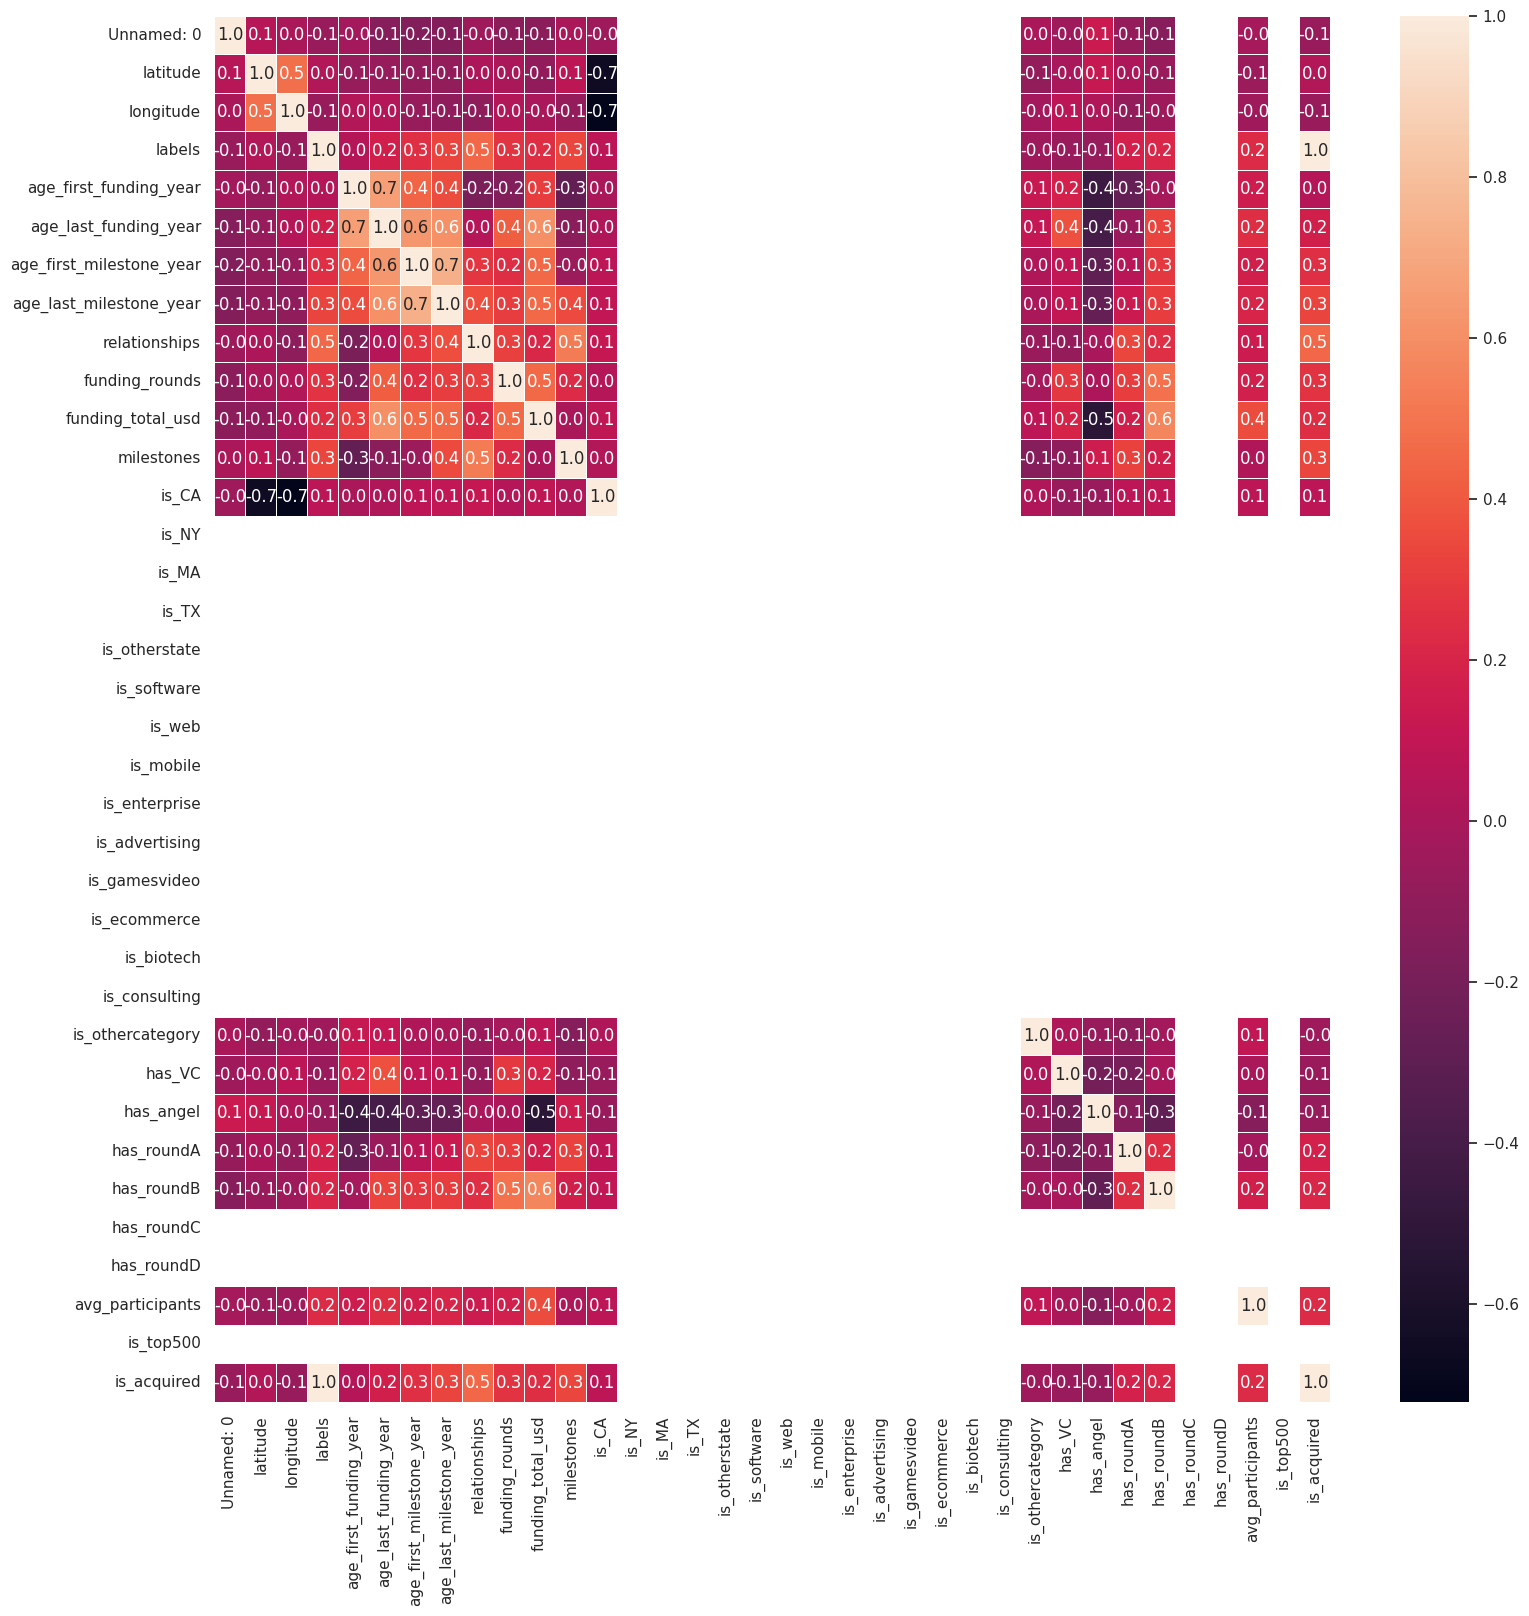

In [9]:
outliersMatt = getOutliersMatrix(numerical_df_1)

dataset[outliersMatt==1]= np.nan

numerical_df_2=dataset.select_dtypes(numerics)

draw_heatmap(numerical_df_2)

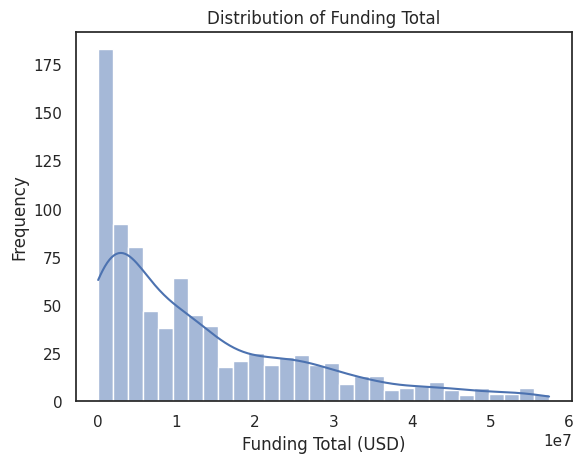

In [13]:
sns.histplot(data=dataset, x='funding_total_usd', bins=30, kde=True)
plt.xlabel('Funding Total (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Funding Total')
plt.show()

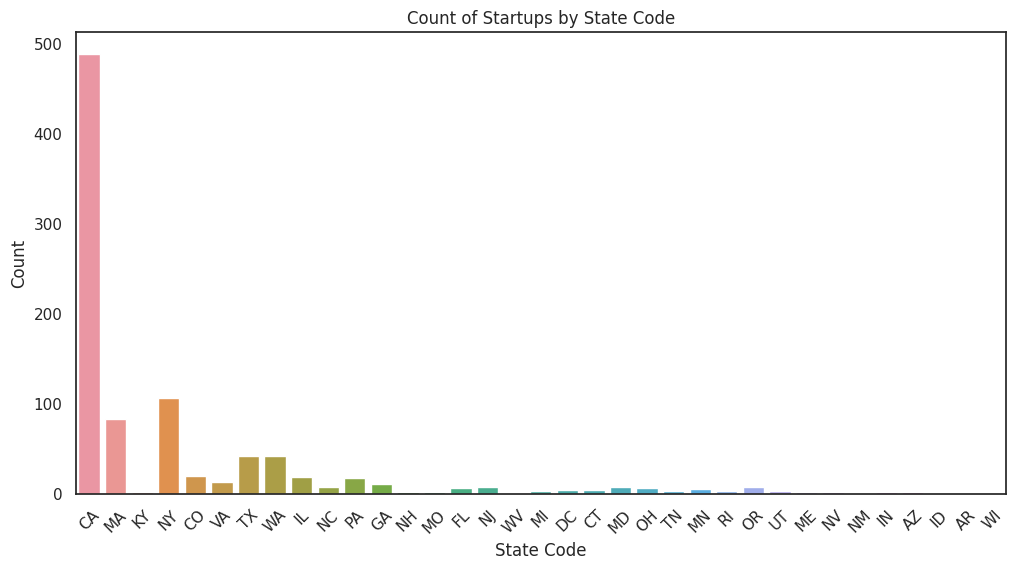

In [19]:
plt.figure(figsize=(12, 6)) 

sns.countplot(data=dataset, x='state_code')

plt.xlabel('State Code')
plt.ylabel('Count')
plt.title('Count of Startups by State Code')
plt.xticks(rotation=45)
plt.show()

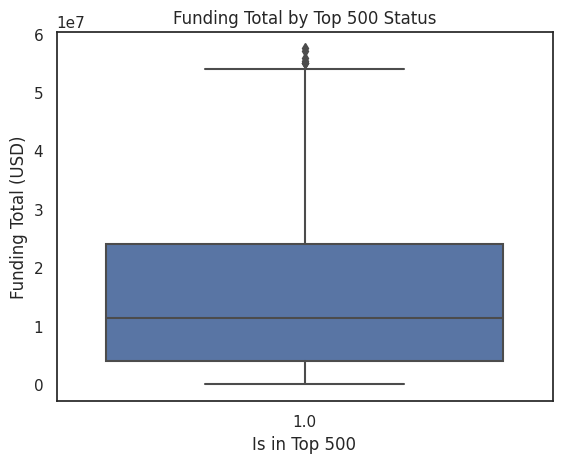

In [16]:
sns.boxplot(data=dataset, x='is_top500', y='funding_total_usd')
plt.xlabel('Is in Top 500')
plt.ylabel('Funding Total (USD)')
plt.title('Funding Total by Top 500 Status')
plt.show()


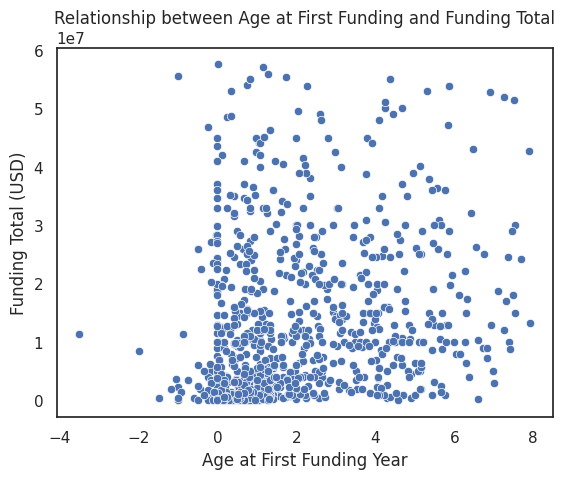

In [17]:
sns.scatterplot(data=dataset, x='age_first_funding_year', y='funding_total_usd')
plt.xlabel('Age at First Funding Year')
plt.ylabel('Funding Total (USD)')
plt.title('Relationship between Age at First Funding and Funding Total')
plt.show()


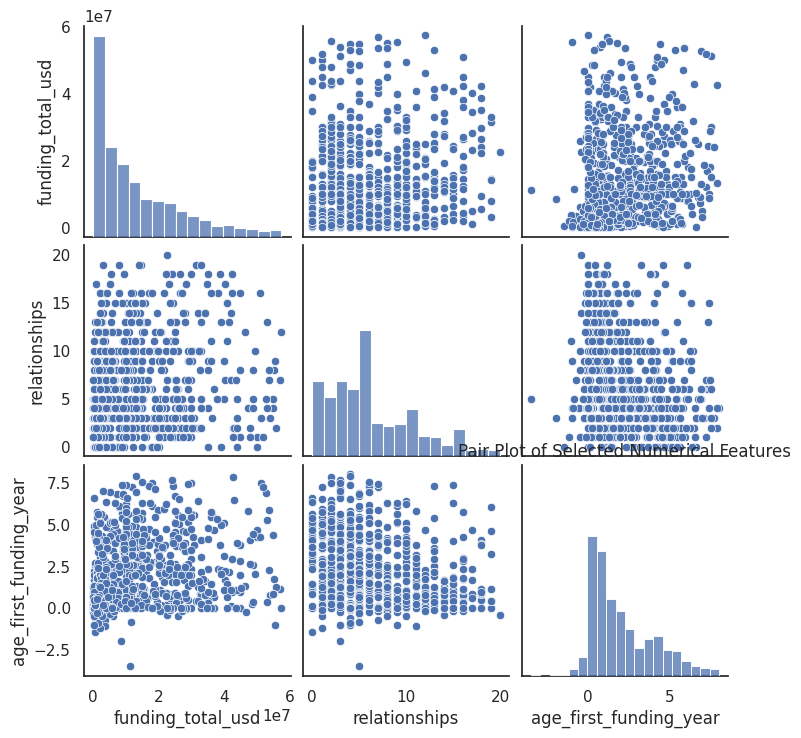

In [22]:
sns.pairplot(dataset[['funding_total_usd', 'relationships', 'age_first_funding_year']])
plt.title('Pair Plot of Selected Numerical Features')
plt.show()


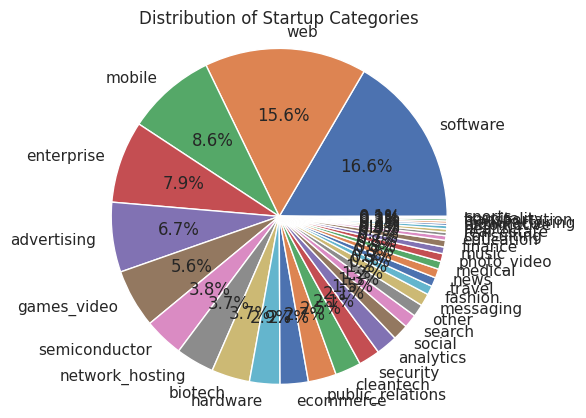

In [23]:
category_counts = dataset['category_code'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Startup Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()